# Exploratory Data Analysis

In [5]:
# Import packages
import os
import re
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

## Load data

In [7]:
# Load data
def parse_input(x):
    if os.path.exists("./data/reports/%s.xml" % x):
        f = open("./data/reports/%s.xml" % x, "r")
        soup = BeautifulSoup(f, 'html.parser')
        reports = soup.find(label='IMPRESSION').get_text().lower()
        return re.sub(r'[\W]', ' ', reports)

image = pd.Series(os.listdir('./data/images'))
number = image.apply(lambda x: x.split('_')[0][3:])
report = number.apply(parse_input)

In [8]:
df = pd.DataFrame({"Image": image, "Number": number, "Caption": report}).dropna().sort_values(['Number']).reset_index(drop=True)
df.head()

,Image,Number,Caption
0,CXR1_1_IM-0001-4001.png,1,normal chest x xxxx
1,CXR1_1_IM-0001-3001.png,1,normal chest x xxxx
2,CXR10_IM-0002-2001.png,10,no acute cardiopulmonary process
3,CXR10_IM-0002-1001.png,10,no acute cardiopulmonary process
4,CXR100_IM-0002-2001.png,100,no active disease


## Sample images and reports

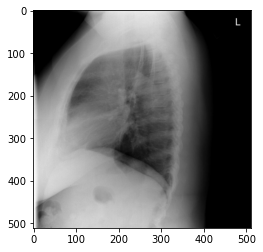

clear lungs  no airspace disease or other parenchymal infiltrates  no xxxx of pleural effusions  no pulmonary edema  normal heart size  mediastinal contours and normal pulmonary vasculature  no xxxx of active cardiopulmonary disease  unchanged 



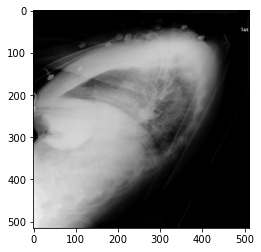

1  no focal airspace consolidation  2  prominent bilateral interstitial opacities  stable from prior radiographs 



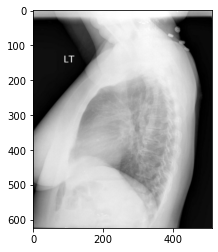

no acute cardiopulmonary findings 



In [9]:
for i in range(3):
    file_name = np.random.choice(df.Image)
    img = Image.open('./data/images/' + file_name)
    plt.imshow(img)
    plt.show()
    print(df[df.Image == file_name].Caption.item())
    print()

## Visualization

In [42]:
texts = df.Caption.unique()
texts = functools.reduce(lambda a, b: a+b, texts).split()
texts = [i for i in texts if i not in set(stopwords.words('english'))]
words_counter = Counter(texts)

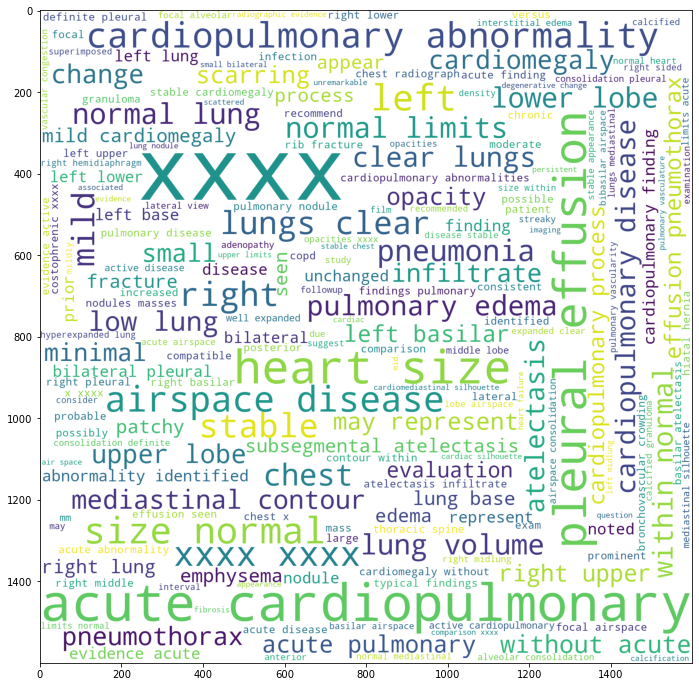

In [43]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(
    width = 1600, height = 1600,
    background_color ='white',
    min_font_size = 10).generate(" ".join(texts))

plt.imshow(wordcloud)
plt.show()

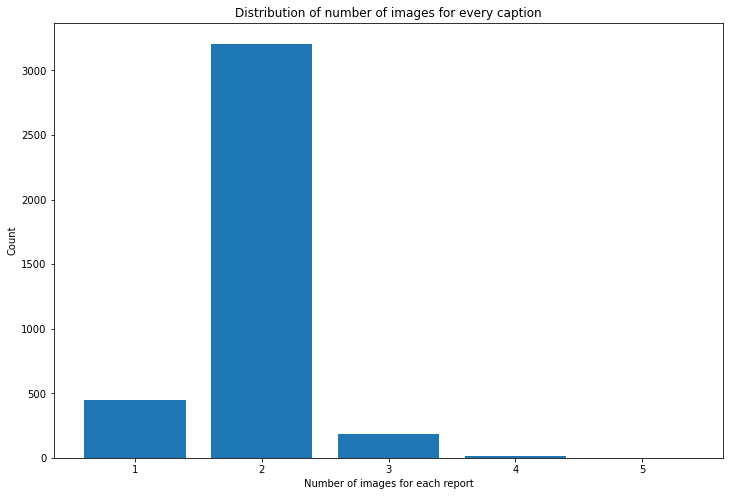

In [30]:
n_img = df.groupby(["Number"]).size().value_counts().reset_index()
n_img.columns = ["Number of Images", "Count"]

plt.figure(figsize=(12,8))
plt.bar(x=n_img["Number of Images"], height=n_img["Count"])
plt.xlabel("Number of images for each report")
plt.ylabel("Count")
plt.title("Distribution of number of images for every caption")
plt.show()

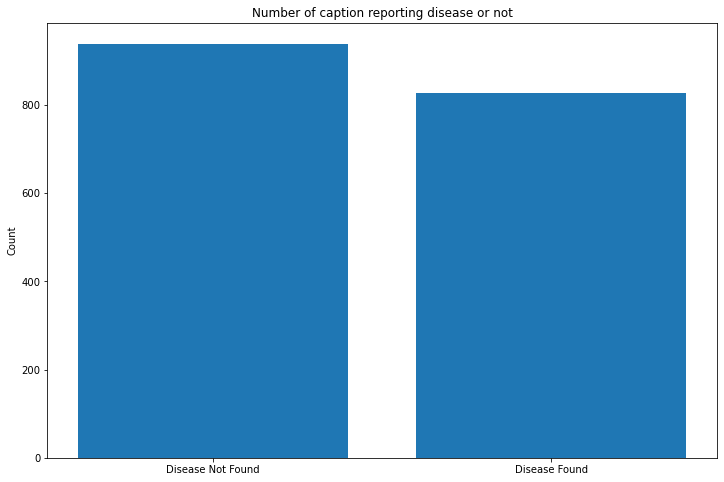

In [55]:
s = pd.Series(df.Caption.unique()).str.contains("no ").value_counts()
plt.figure(figsize=(12, 8))
plt.bar(x=["Disease Not Found", "Disease Found"], height=s)
plt.ylabel("Count")
plt.title("Number of caption reporting disease or not")
plt.show()